In [154]:
from utils import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [250]:
df = loadData()
df.drop(columns=["Unnamed: 0"],inplace=True)  
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# Question 1

## 1.1

In [251]:
#Assigning quantitative values to qualitative features
diamondsDF = df.copy(deep=True)

cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
for i in range(len(cutLabels)):
    diamondsDF['cut'].replace(cutLabels[i],i+1,inplace=True)

clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
for i in range(len(clarityLabels)):
    diamondsDF['clarity'].replace(clarityLabels[i],i+1,inplace=True)

colorLabels = (list(string.ascii_uppercase[3:10]))
for i in range (len(colorLabels)):
    diamondsDF['color'].replace(colorLabels[i],len(colorLabels)-i,inplace=True)
diamondsDF.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


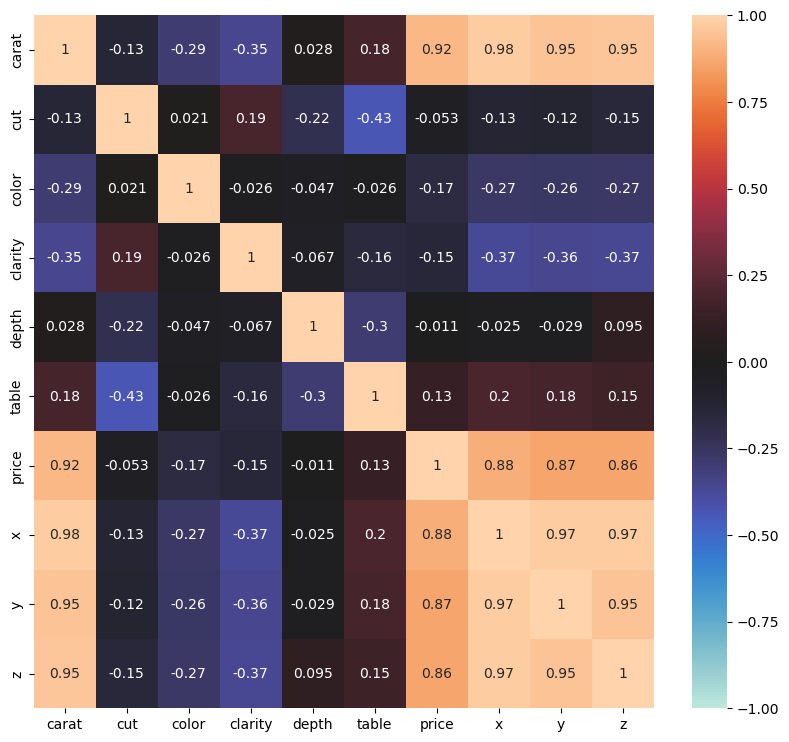

In [273]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(diamondsDF.corr(),vmin=-1,vmax=1,center=0,annot=True)


In [313]:
diamondsDF.corr()['price'].to_csv("../Figures/price_corr_table")
print(diamondsDF.corr()['price'])

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64


We see by observation that the variable other than **price** that has the highest correlation with the **price** of a diamond is **carat**—the weight of the diamond.  

There is a very positive correlation between the **price** of a diamond and its weight, as well as its size. We know this because **x**,**y**,**z** which refer to the length, width and depth of the diamond,  have very similar positive correlations with **price** of a diamond. **table** has a small positive correlation, meaning it doesn't affect the price of the diamond very much, but it does have a slight positive effect. Finally, **depth** has a correlation near zero, meaning that it has almost no effect on **price**.

Next, let us consider the qualitative features. We see negative covariance values between clarity, 

## 1.2

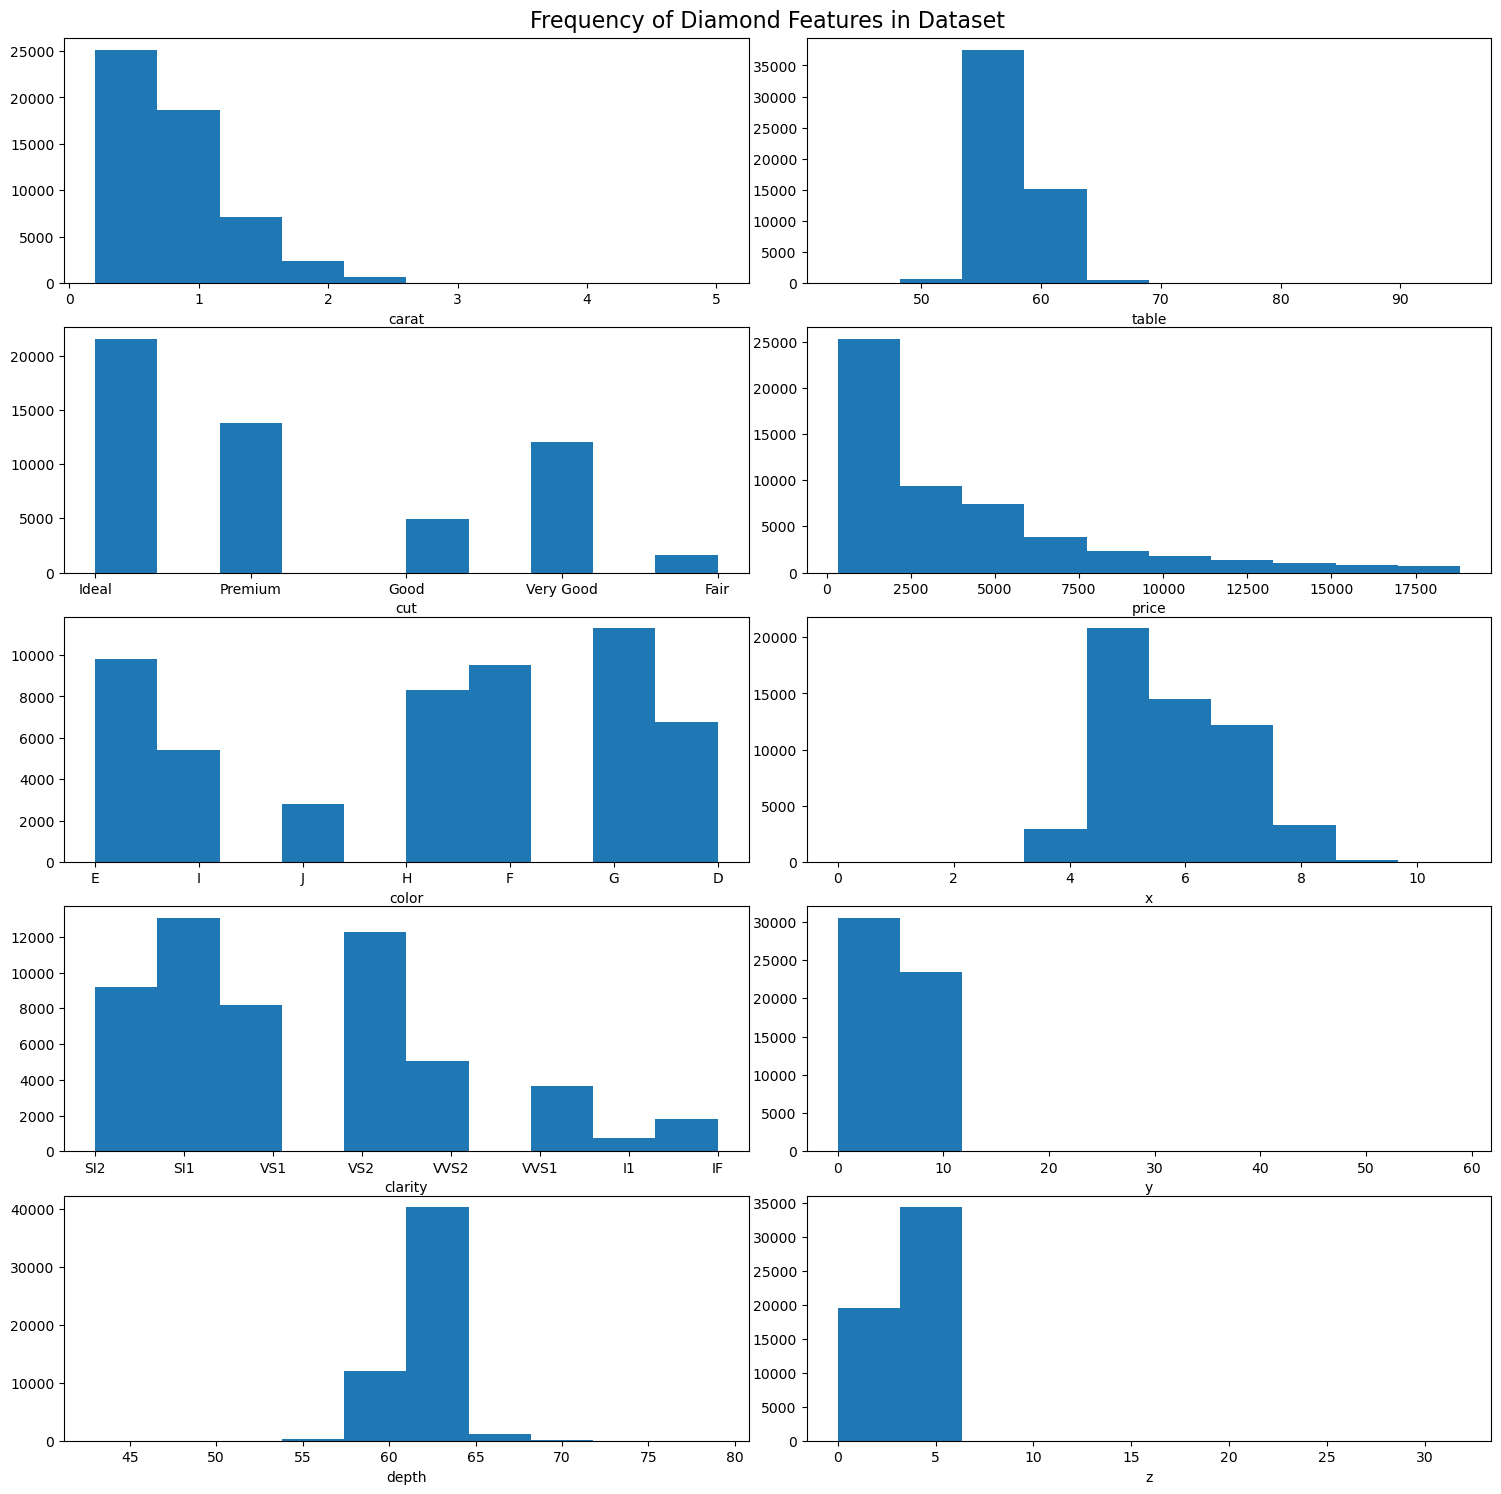

In [256]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

## 1.3

In [327]:
from pandas.api.types import CategoricalDtype
import random

<Axes: title={'center': 'price'}, xlabel='clarity'>

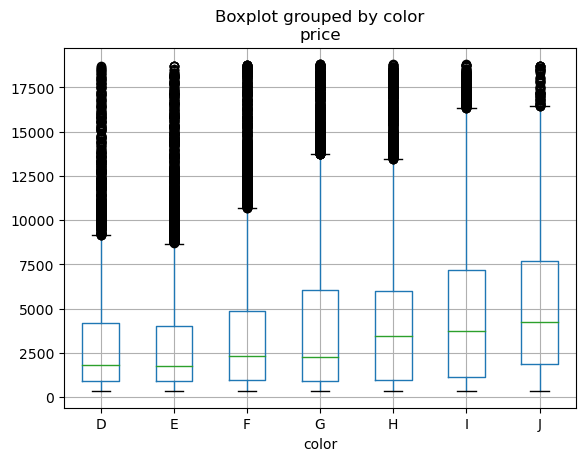

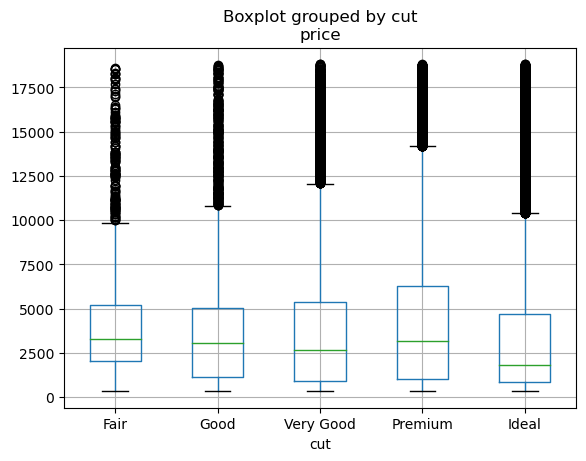

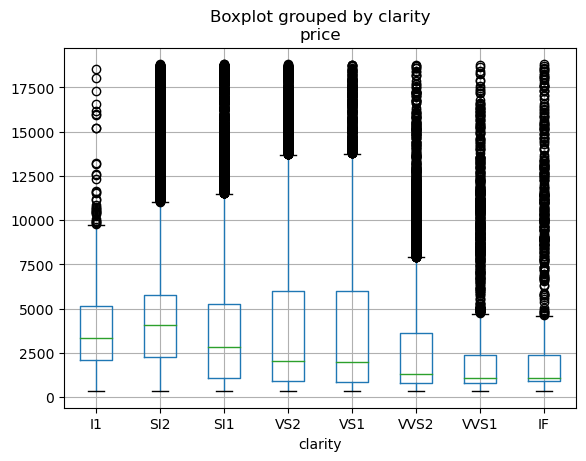

In [295]:
df.boxplot(column='price',by='color')
cutOrder = CategoricalDtype(cutLabels, ordered=True)
df['cut']=df['cut'].astype(cutOrder)
df.boxplot(column='price',by='cut')
clarityOrder = CategoricalDtype(clarityLabels, ordered=True)
df['clarity'] = df['clarity'].astype(clarityOrder)
df.boxplot(column='price',by='clarity')

# Question 2


## 2.1

In [259]:
from sklearn.preprocessing import StandardScaler

In [304]:
scaler = StandardScaler()
standardizedDF = pd.DataFrame(scaler.fit_transform(diamondsDF),columns=diamondsDF.columns)
standardizedDF['price']= diamondsDF['price']
standardizedDF.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672,330,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529,327,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663,328,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928,337,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928,338,-1.240167,-1.212238,-1.117674


## 2.2

In [340]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [343]:
train, test = train_test_split(standardizedDF, test_size=0.1)

In [344]:
X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])
y_train = train['price']
y_test = test['price']

In [345]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 275773.007266
Feature 1: 141.164396
Feature 2: 1501.531488
Feature 3: 1107.854485
Feature 4: 4.002110
Feature 5: 796.852896
Feature 6: 174909.203297
Feature 7: 142318.006326
Feature 8: 137538.300114


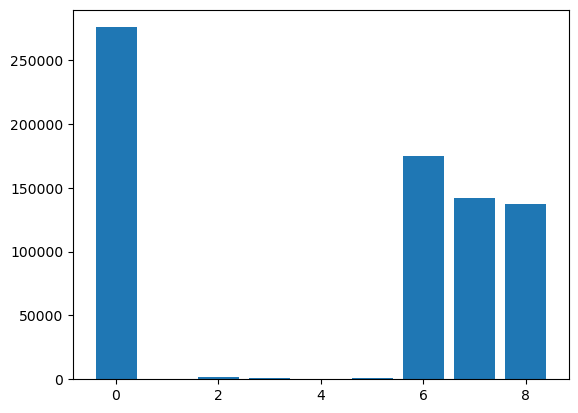

In [351]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, noise=0.1, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [341]:

clf = RandomForestClassifier() #Initialize with whatever parameters you want to

# 10-Fold Cross validation
print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (517720222.py, line 4)